**Add pre-installed package path & load packages:**

In [1]:
.libPaths(c(.libPaths(), "/exports/eddie3_apps_local/apps/SL7/R/4.3.0/lib64/R/library"))

In [2]:
library("dplyr", warn.conflicts = F)
library("stringr", warn.conflicts = F)
library("data.table", warn.conflicts = F) 
library("vroom", warn.conflicts = F)
library("ggplot2", warn.conflicts = F)
library("EnhancedVolcano")

Loading required package: ggrepel



In [3]:
packageVersion("EnhancedVolcano")


[1] ‘1.18.0’

**Change working directory:**

In [4]:
wd = "/exports/cmvm/eddie/smgphs/groups/Quantgen/Users/vasilis/PHD/proteomics/delirium/output_pwas_models12/"
setwd(wd)
getwd()

[1] "/exports/cmvm/eddie/smgphs/groups/Quantgen/Users/vasilis/PHD/proteomics/delirium/output_pwas_models12"

**Load data:**

In [5]:
file <- "del_model1_glm_int_fullset_sumstats.txt"
pwas <- fread(file) %>% mutate(OR = exp(BETA)) # + make OR = e^beta

In [6]:
?EnhancedVolcano

**Make Volcano Plot:**

Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_vline()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_vline()`).”


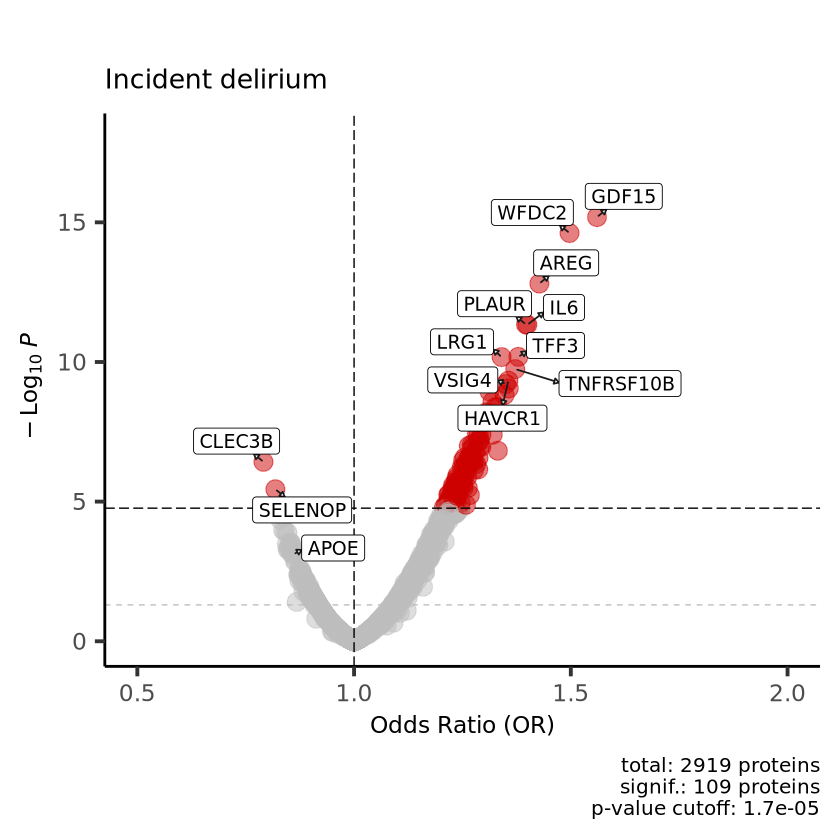

In [9]:
sign    = pwas %>% filter(PVALUE < 0.05/nrow(pwas)) %>% nrow
caption = paste0("total: ", nrow(pwas), " proteins", "\n", 
                 "signif.: ", sign, " proteins", "\n", 
                 "p-value cutoff: ", round(0.05/nrow(pwas), 6))
pos <- pwas %>% arrange(PVALUE) %>% filter(PVALUE < 0.05/nrow(pwas) & OR > 1) %>% pull(PROTEIN) %>% head(10)
neg <- pwas %>% arrange(OR) %>% filter(PVALUE < 0.05/nrow(pwas) & OR < 1) %>% pull(PROTEIN) %>% head(10)


EV <-
EnhancedVolcano(pwas, 
                lab=pwas$PROTEIN, 
                x="OR", 
                y="PVALUE", 
                pCutoff=0.05/nrow(pwas), 
                hlineCol=c("grey"),
                hlineType=c("dashed"),
                hline=c(0.05),
                xlab="Odds Ratio (OR)", 
                col=c("grey","grey", "red3", "red3"),
                gridlines.major = FALSE,
                gridlines.minor = FALSE,
                xlim=c(0.5,2), 
                ylim=c(0,18), 
                axisLabSize = 14,
                #title="Logistic Regression Model", 
                title="",
                subtitle="Incident delirium",
                subtitleLabSize=16,
                legendPosition="bottom",
                #legendLabels = FALSE,
                drawConnectors = T, 
                FCcutoff=1, 
                selectLab=c(neg, pos, "APOE"), 
                pointSize=5, 
                labSize=4,
                boxedLabels = TRUE,
                caption=caption, 
                captionLabSize=12) + 
theme(legend.position="none") 
EV

ggsave("pwas_vp_bigdots.png", dpi = 400)


In [8]:
## APOE sumstats
pwas %>%
    mutate(LCI = BETA - (1.96*STDERR)) %>% 
    mutate(HCI = BETA + (1.96*STDERR)) %>% 
    filter(PROTEIN == "APOE") 

PROTEIN,BETA,STDERR,PVALUE,NCASES,NCONTROLS,UniProt,Panel,UniProt2,Gene_CHROM,Gene_start,Gene_end,OR,LCI,HCI
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
APOE,-0.1502851,0.04466934,0.0007671292,541,32111,P02649,Inflammation II,P02649,19,44905791,44909393,0.8604626,-0.237837,-0.0627332
